In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm
import math

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


In [9]:

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331760998
2nd excited state energy:  1.971733134393021


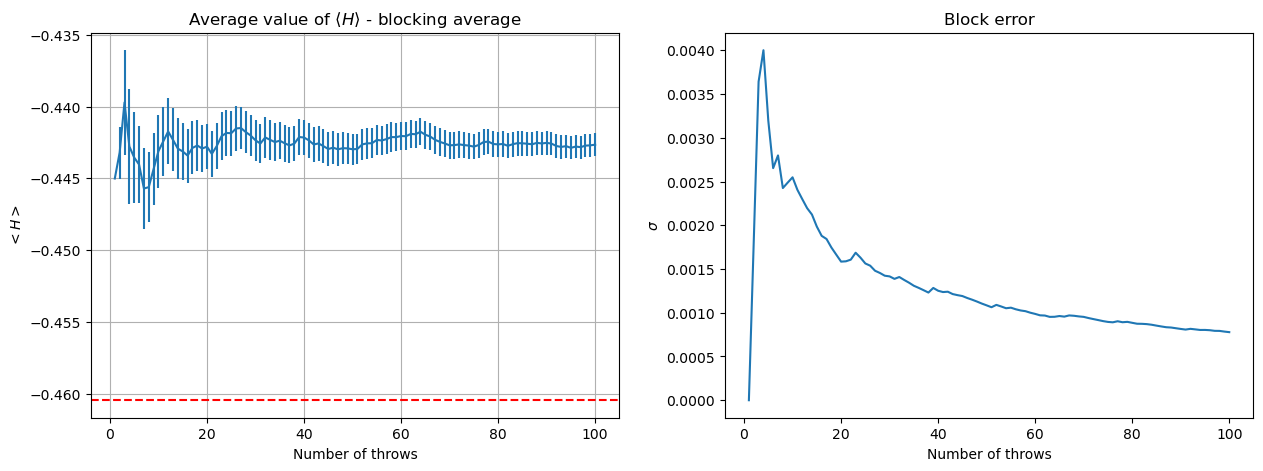

In [10]:
n_throws, cum_avg, block_error, acceptance = np.loadtxt("../data/ex08_block.dat", unpack=True, usecols=(0,1,2,4))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.errorbar(n_throws, cum_avg, yerr=block_error)
plt.title(r"Average value of $\langle H \rangle$ - blocking average")
plt.axhline(y=E[0], color='r', linestyle='--')
plt.xlabel('Number of throws')
plt.ylabel(r"$<H>$")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_throws, block_error)
plt.title("Block error")
plt.xlabel('Number of throws')
plt.ylabel(r"$\sigma$")

plt.show()

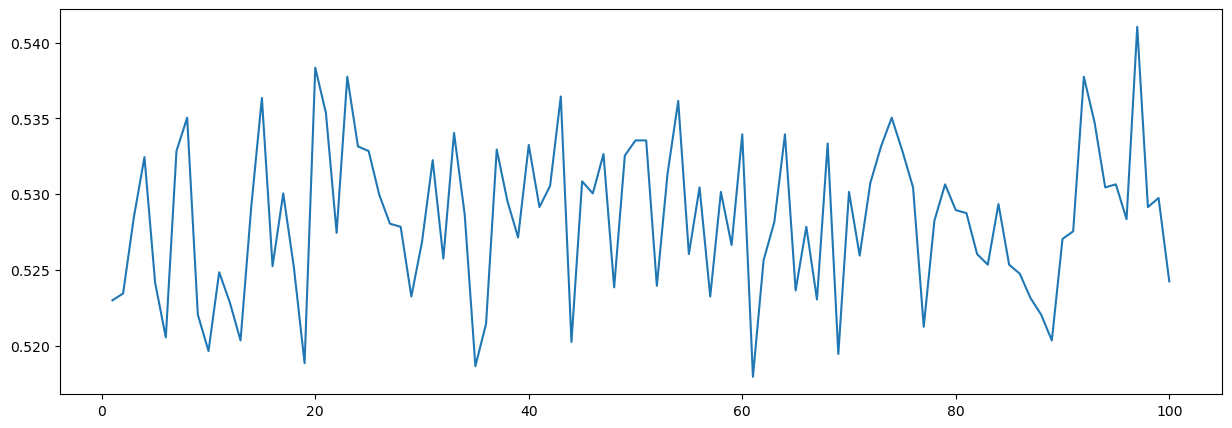

In [11]:
plt.figure(figsize=(15,5))

plt.plot(n_throws, acceptance)
plt.show()

mu = 0.7897685983759052
sigma = 0.6288548815435726
n = 1.5178035320364973
mu =  0.8310055447104061 
sigma =  0.6527806835409493 
n =  1.547225760167612


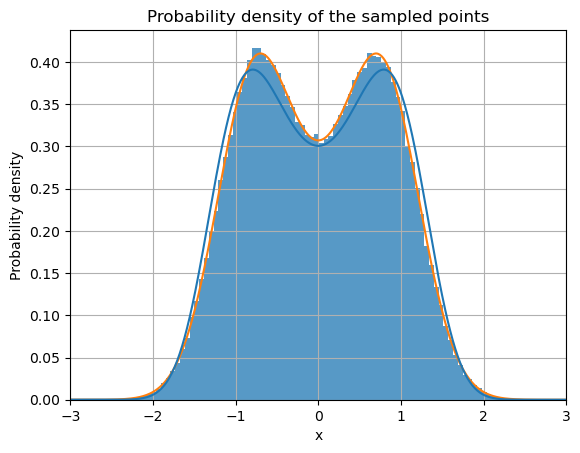

In [12]:
coord = np.loadtxt("../data/ex08_coord.dat", unpack=True)

hist = plt.hist(coord, bins=100, density=True, alpha=0.75, color=colors[0])
plt.title("Probability density of the sampled points")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.grid(True)

def f(x, mu, sigma, nn):
    return (1/(nn*np.sqrt(np.pi)))*(np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2

popt1, pcov1 = curve_fit(f, hist[1][:-1], hist[0])

print("mu =", popt1[0])
print("sigma =", popt1[1])
print("n =", popt1[2])

popt, pcov = curve_fit(f, x, (psi[0])**2)

print("mu = ", popt[0]
      , "\nsigma = ", popt[1]
    , "\nn = ", popt[2]
    )

y = f(x, *popt1)

# plt.plot(x, f(x, *popt), color=colors[1])

plt.plot(x, y, color=colors[1])

# Plot a few things
plt.plot(x,(psi[0])**2)
plt.grid(True)
plt.xlim((-3,3))

plt.show()